# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 70px; font-weight: bold;">Flower Classification</span>

In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import os

In [2]:
# Disable Jedi autocompletion for the current session
%config Completer.use_jedi = False

In [3]:
# Display GPU or CPU information using the nvidia-smi command
!nvidia-smi

Thu Aug 24 01:28:19 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   45C    P8               8W /  80W |    611MiB /  6144MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
# Import the PyTorch library
import torch

# Print the version of the imported PyTorch library
print("PyTorch version:", torch.__version__)

PyTorch version: 2.0.1+cu118


In [7]:
# Import the fastai library
import fastai

# Print the version of the imported fastai library
print("fastai version:", fastai.__version__)

fastai version: 2.7.12


In [8]:
# Import necessary modules from the fastai library for computer vision tasks
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 40px; font-weight: bold;">Import dataset</span>

In [69]:
# Unzip zip files
#!unzip '/content/drive/MyDrive/Copy of flowers.zip'

Archive:  /content/drive/MyDrive/Copy of flowers.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [18]:
# Define a variable to store the path to a dataset directory
data_path = '/content/flowers'

In [19]:
# Define data transformations and create ImageDataLoaders from a folder
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)  # Transformation for individual items
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]  # Transformation for batches

# Create ImageDataLoaders using specified data transformations
data = ImageDataLoaders.from_folder(data_path,
                                    item_tfms=tfms_for_item,
                                    batch_tfms=tfms_for_batch,
                                    seed = 101,
                                    valid_pct=0.15,
                                    shuffle=True)

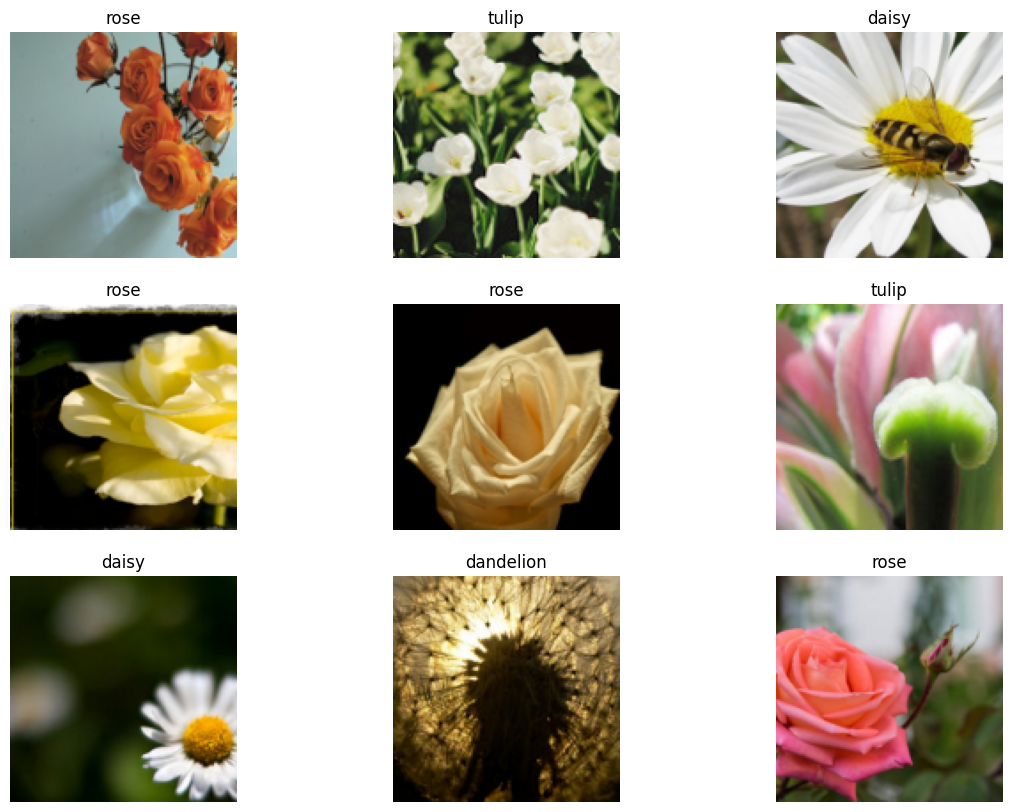

In [20]:
# Display a batch of images from the dataset
data.show_batch(figsize=(14, 10))

In [21]:
# Print the number of classes in the dataset
print('Number of classes:', data.c)

Number of classes: 5


# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 40px; font-weight: bold;">Modeling</span>

In [50]:
# Create a vision model using the fastai library
model = vision_learner(data, resnet101, metrics=accuracy, model_dir='/tmp/model/')

In [51]:
# Display a summary of the model's architecture and parameters
model.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 32 x 32  
Conv2d                                    16384      False     
BatchNorm2d                        

SuggestedLRs(valley=0.0008317637839354575)

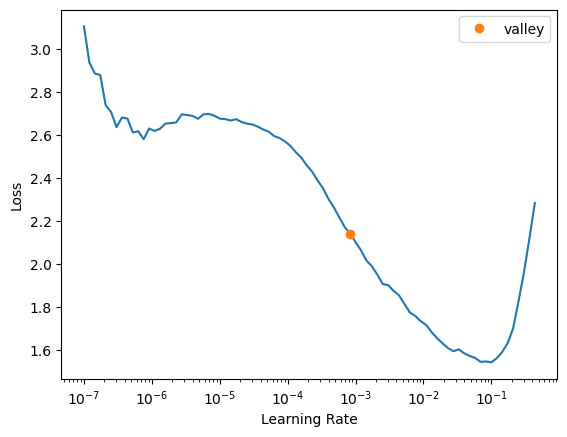

In [52]:
# Find an optimal learning rate using the learning rate finder
model.lr_find()

# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 40px; font-weight: bold;">Fitting the model</span>

In [54]:
# Train the model using the fit_one_cycle method
# Parameters:
# - 5: Number of epochs (complete passes through the training data)
# - 0.0008: Base learning rate for the cyclical learning rate schedule
model.fit_one_cycle(5, 0.000831)

epoch,train_loss,valid_loss,accuracy,time
0,0.321355,0.434236,0.868827,00:22
1,0.315957,0.447719,0.878086,00:19
2,0.265431,0.392829,0.895062,00:20
3,0.210677,0.369996,0.901235,00:18
4,0.176182,0.381724,0.895062,00:20


In [55]:
# Save the trained model
model.save('my_model.pkl')

Path('/tmp/model/my_model.pkl.pth')

# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 40px; font-weight: bold;">Evaluation</span>

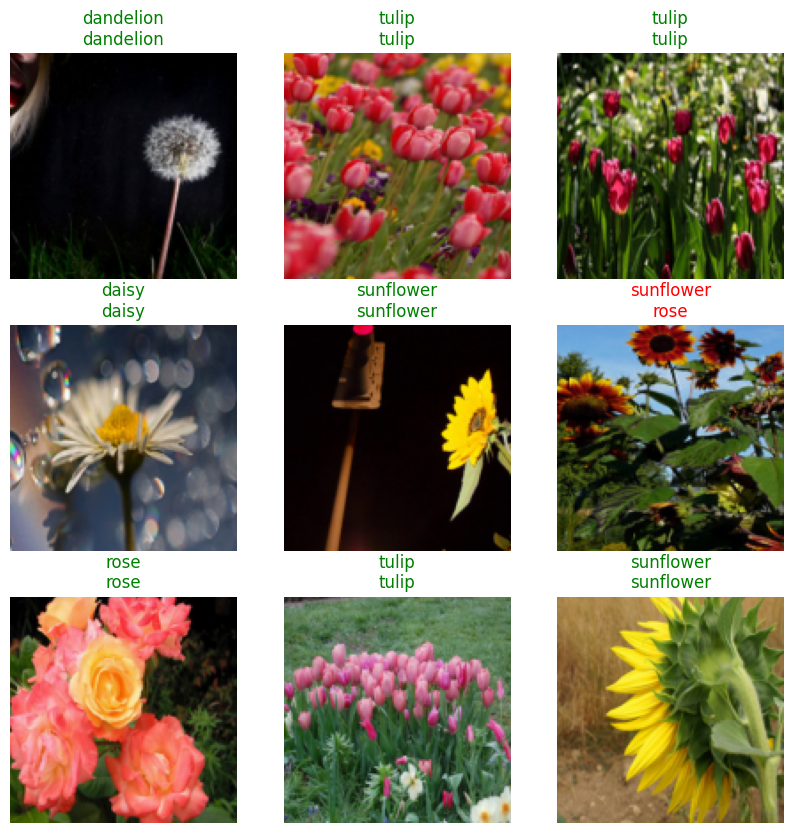

In [58]:
# Show the results of the model's predictions
model.show_results(figsize = (10, 10))

In [59]:
# Create an Interpretation object to analyze model predictions
interp = Interpretation.from_learner(model)

In [60]:
# Create a ClassificationInterpretation object to analyze model predictions
interp2 = ClassificationInterpretation.from_learner(model)

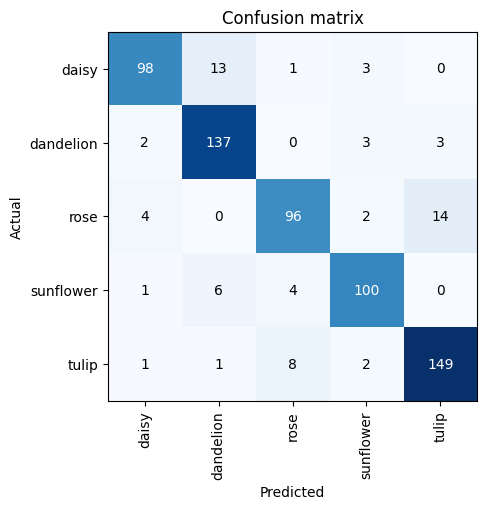

In [62]:
# Plot a confusion matrix to visualize model's classification performance
interp2.plot_confusion_matrix(figsize = (5, 5), dpi = 100)

In [63]:
# Find and display the classes that are most commonly confused by the model
interp2.most_confused(min_val = 2)

[('rose', 'tulip', 14),
 ('daisy', 'dandelion', 13),
 ('tulip', 'rose', 8),
 ('sunflower', 'dandelion', 6),
 ('rose', 'daisy', 4),
 ('sunflower', 'rose', 4),
 ('daisy', 'sunflower', 3),
 ('dandelion', 'sunflower', 3),
 ('dandelion', 'tulip', 3),
 ('dandelion', 'daisy', 2),
 ('rose', 'sunflower', 2),
 ('tulip', 'sunflower', 2)]

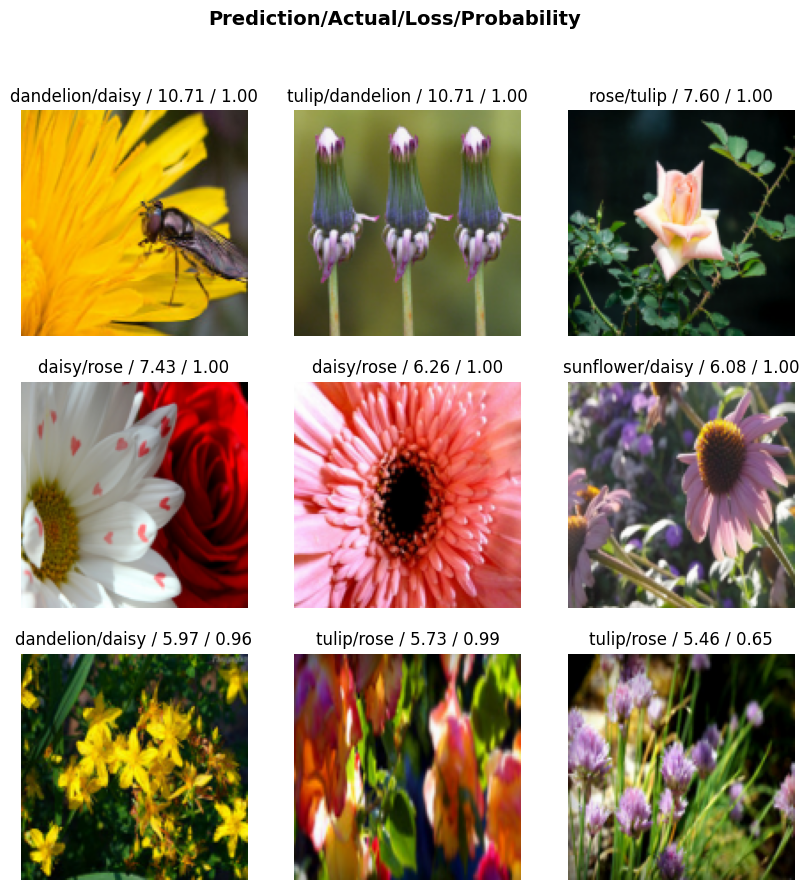

In [64]:
# Plot the top loss examples to visualize instances where the model's predictions were most incorrect
interp.plot_top_losses(9, figsize = (10, 10))